In [1]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
accepts = pd.read_csv("data/chefmozaccepts.csv")
cuisine = pd.read_csv("data/chefmozcuisine.csv")
hours = pd.read_csv("data/chefmozhours4.csv")
parking = pd.read_csv("data/chefmozparking.csv")
geo = pd.read_csv("data/geoplaces2.csv", encoding="ISO-8859-1")
usercuisine = pd.read_csv("data/usercuisine.csv")
payment = pd.read_csv("data/userpayment.csv")
profile = pd.read_csv("data/userprofile.csv")
rating = pd.read_csv("data/rating_final.csv")

print("Jumlah data pembayaran yang diterima restoran: ", len(accepts.placeID.unique()))
print("Jumlah data masakan pada restoran: ", len(cuisine.placeID.unique()))
print("Jumlah data waktu buka restoran: ", len(hours.placeID.unique()))
print("Jumlah data lokasi restoran: ", len(geo.placeID.unique()))
print("Jumlah data masakan pengguna: ", len(usercuisine.userID.unique()))
print("Jumlah data profil pengguna: ", len(profile.userID.unique()))
print("Jumlah data penilaian yang diberikan pengguna: ", len(rating.userID.unique()))
print("Jumlah data penilaian restoran: ", len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran:  615
Jumlah data masakan pada restoran:  769
Jumlah data waktu buka restoran:  694
Jumlah data lokasi restoran:  130
Jumlah data masakan pengguna:  138
Jumlah data profil pengguna:  138
Jumlah data penilaian yang diberikan pengguna:  138
Jumlah data penilaian restoran:  130


In [3]:
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [4]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df["userID"].unique().tolist()
print("list userID: ", user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print("encoded userID : ", user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("encoded angka ke userID: ", user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

In [5]:
# Mengubah placeID menjadi list tanpa nilai yang sama
resto_ids = df["placeID"].unique().tolist()

# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}

# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

In [7]:
# Mapping userID ke dataframe user
df["user"] = df["userID"].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df["resto"] = df["placeID"].map(resto_to_resto_encoded)

In [8]:
df

,userID,placeID,rating,food_rating,service_rating,user,resto
0,U1077,135085,2,2,2,0,0
1,U1077,135038,2,2,1,0,1
2,U1077,132825,2,2,2,0,2
3,U1077,135060,1,2,2,0,3
4,U1068,135104,1,1,2,1,4
...,...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,136,8
1157,U1011,132715,1,1,0,137,21
1158,U1068,132733,1,1,0,1,10
1159,U1068,132594,1,1,1,1,23


In [9]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)

# Mengubah rating menjadi nilai float
df["rating"] = df["rating"].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df["rating"])

# Nilai maksimal rating
max_rating = max(df["rating"])

print(
    "Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}".format(
        num_users, num_resto, min_rating, max_rating
    )
)

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


In [10]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


In [11]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[["user", "resto"]].values

# Membuat variabel y untuk membuat rating dari hasil
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


In [12]:
class RecommenderNet(tf.keras.Model):
    # Insialisasi fungsi
    def __init__(self, num_users, num_resto, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_resto = num_resto
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(  # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)  # layer embedding user bias
        self.resto_embedding = layers.Embedding(  # layer embeddings resto
            num_resto,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.resto_bias = layers.Embedding(num_resto, 1)  # layer embedding resto bias

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])  # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0])  # memanggil layer embedding 2
        resto_vector = self.resto_embedding(inputs[:, 1])  # memanggil layer embedding 3
        resto_bias = self.resto_bias(inputs[:, 1])  # memanggil layer embedding 4

        dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

        x = dot_user_resto + user_bias + resto_bias

        return tf.nn.sigmoid(x)  # activation sigmoid

In [15]:
model = RecommenderNet(num_users, num_resto, 50)  # inisialisasi model

# model compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)

In [17]:
history = model.fit(
    x=x_train, y=y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val)
)

Epoch 1/100

116/116 [==============================] - 1s 3ms/step - loss: 0.7001 - root_mean_squared_error: 0.4028 - val_loss: 0.6957 - val_root_mean_squared_error: 0.4026
Epoch 2/100
116/116 [==============================] - 0s 1ms/step - loss: 0.6758 - root_mean_squared_error: 0.3878 - val_loss: 0.6914 - val_root_mean_squared_error: 0.4000
Epoch 3/100
116/116 [==============================] - 0s 1ms/step - loss: 0.6617 - root_mean_squared_error: 0.3788 - val_loss: 0.6883 - val_root_mean_squared_error: 0.3981
Epoch 4/100
116/116 [==============================] - 0s 1ms/step - loss: 0.6524 - root_mean_squared_error: 0.3729 - val_loss: 0.6840 - val_root_mean_squared_error: 0.3954
Epoch 5/100
116/116 [==============================] - 0s 1ms/step - loss: 0.6435 - root_mean_squared_error: 0.3671 - val_loss: 0.6795 - val_root_mean_squared_error: 0.3926
Epoch 6/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6348 - root_mean_squared_error: 0.3616 - val_loss: 0.6766

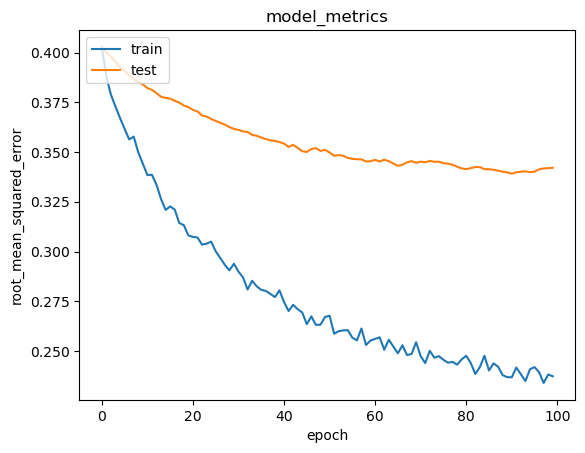

In [18]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("model_metrics")
plt.ylabel("root_mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [19]:
all_resto_name = pd.merge(
    rating.copy(), geo[["placeID", "name"]], on="placeID", how="left"
)

all_resto = pd.merge(all_resto_name, cuisine, on="placeID", how="left")

all_resto_clean = all_resto.dropna()

fix_resto = all_resto_clean.sort_values("placeID", ascending=True)

fix_resto = fix_resto.replace("Game", "American")

fix_resto = fix_resto.drop_duplicates("placeID")


In [20]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
resto_id = fix_resto["placeID"].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
resto_name = fix_resto["name"].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
resto_cuisine = fix_resto["Rcuisine"].tolist()

print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


In [21]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
resto_new = pd.DataFrame(
    {"id": resto_id, "resto_name": resto_name, "cuisine": resto_cuisine}
)
resto_new


,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


In [54]:
resto_df = resto_new
df = pd.read_csv("data/rating_final.csv")

# Mengambil sample user
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
resto_not_visited = resto_df[
    ~resto_df["id"].isin(resto_visited_by_user.placeID.values)
]["id"]
resto_not_visited = list(
    set(resto_not_visited).intersection(set(resto_to_resto_encoded.keys()))
)

resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [55]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for users: {}".format(user_id))
print("===" * 9)
print("Resto with high ratings from user")
print("----" * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .placeID.values
)

resto_df_rows = resto_df[resto_df["id"].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(row.resto_name, ":", row.cuisine)

print("----" * 8)
print("Top 10 resto recommendation")
print("----" * 8)

recommended_resto = resto_df[resto_df["id"].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(row.resto_name, ":", row.cuisine)

3/3 [==============================] - 0s 5ms/step
Showing recommendations for users: U1016
Resto with high ratings from user
--------------------------------
Gorditas Doa Gloria : Mexican
Unicols Pizza : Italian
Cafeteria y Restaurant El Pacifico : Cafeteria
El Rincón de San Francisco : Mexican
--------------------------------
Top 10 resto recommendation
--------------------------------
La Estrella de Dimas : Mexican
Mariscos Tia Licha : Family
El cotorreo : Mexican
KFC : American
Restaurant Las Mananitas : International
Michiko Restaurant Japones : Japanese
la Cochinita Pibil Restaurante Yucateco : Mexican
Restaurant Bar Hacienda los Martinez : Bar
Restaurante la Parroquia Potosina : Contemporary
Mariscos El Pescador : Seafood
